In [2]:
data = '/Users/smaran/Documents/MAJOR/Project/Phishing_Email.csv'

In [3]:
# for data
import pandas as pd
import numpy as np

# for visualization
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from wordcloud import WordCloud


# nltk used for NLP
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Preprocessing (sklearn)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [4]:
df = pd.read_csv(data)

In [10]:
print(df.isnull().sum())

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64


In [11]:
df.dropna(inplace=True)
print(df.isnull().sum())

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64


In [12]:
df.head()

Unnamed: 0                                         Email Text  \
0           0  re : 6 . 1100 , disc : uniformitarianism , re ...   
1           1  the other side of * galicismos * * galicismo *...   
2           2  re : equistar deal tickets are you still avail...   
3           3  \nHello I am your hot lil horny toy.\n    I am...   
4           4  software at incredibly low prices ( 86 % lower...   

       Email Type  
0      Safe Email  
1      Safe Email  
2      Safe Email  
3  Phishing Email  
4  Phishing Email

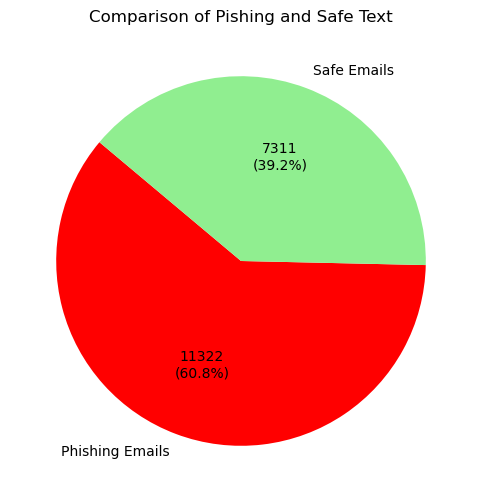

In [13]:
email_counts = df['Email Type'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(email_counts, labels=['Phishing Emails', 'Safe Emails'], autopct=lambda pct: f"{int(pct/100*sum(email_counts))}\n({pct:.1f}%)", startangle=140, colors=['Red', 'lightgreen'])
plt.title('Comparison of Pishing and Safe Text')
plt.show()

In [14]:
df['Email Text'] = df['Email Text'].str.lower()

In [15]:
import string
import re

def remove_special_characters(word):
    return word.translate(str.maketrans('', '', string.punctuation))
df['Email Text'] = df['Email Text'].apply(remove_special_characters)

In [16]:
#Define stop-words in English
ENGLISH_STOP_WORDS = set(stopwords.words('english'))

def remove_stop_words(words):
    return [word for word in words if word not in ENGLISH_STOP_WORDS]

#Tokenize the text
df['Email Text'] = df['Email Text'].apply(word_tokenize)

#Remove stop words
df['Email Text'] = df['Email Text'].apply(remove_stop_words)

#Rejoin words for EDA
df['Email Text'] = df['Email Text'].apply(' '.join)

In [17]:
def remove_hyperlink(word):
    return re.sub(r"http\S+", "", word)

df['Email Text'] = df['Email Text'].apply(remove_hyperlink)

In [18]:
from collections import Counter
from wordcloud import WordCloud

# Separate the spam and legitimate emails
spam_emails = df[df['Email Type'] == 'Phishing Email']['Email Text']
legit_emails = df[df['Email Type'] == 'Safe Email']['Email Text']

# Count word frequencies for spam
spam_words = Counter()
spam_emails.apply(lambda x: spam_words.update(x.split()))

# Count word frequencies for legitimate emails
legit_words = Counter()
legit_emails.apply(lambda x: legit_words.update(x.split()))

# Get the most common words in spam and legitimate emails
spam_common = spam_words.most_common(10)
legit_common = legit_words.most_common(10)

# Convert to DataFrame
spam_common_df = pd.DataFrame(spam_common, columns=['Word', 'Frequency'])
legit_common_df = pd.DataFrame(legit_common, columns=['Word', 'Frequency'])

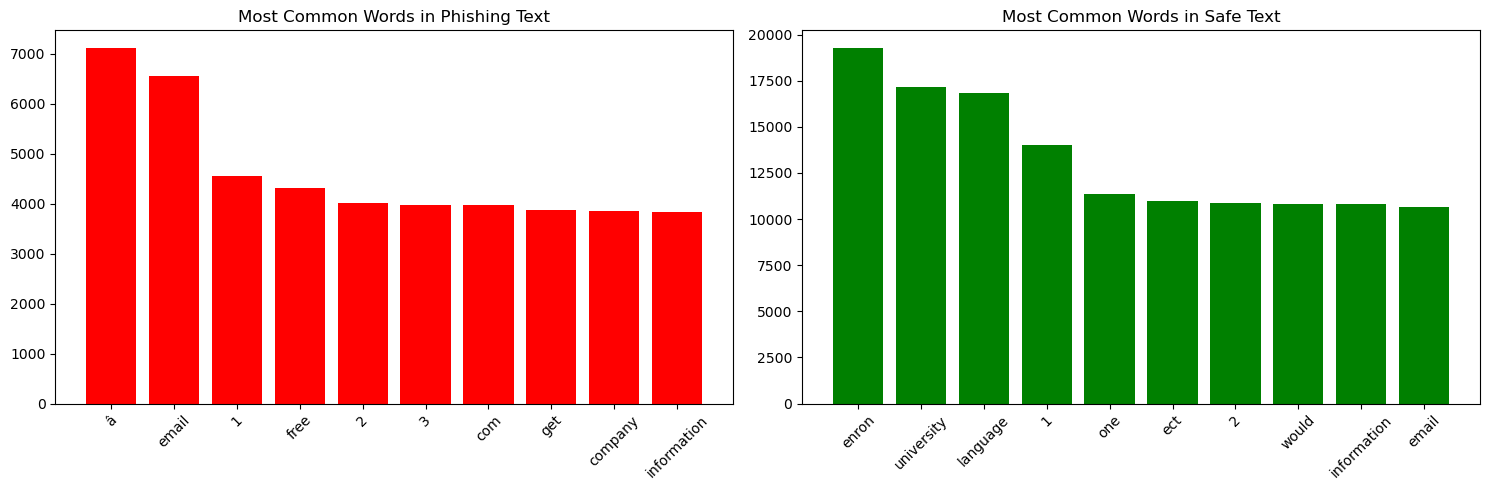

In [19]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.bar(spam_common_df['Word'], spam_common_df['Frequency'], color='red')
plt.title('Most Common Words in Phishing Text')
plt.xticks(rotation=45)

# Plotting the most common words in legitimate emails
plt.subplot(1, 2, 2)
plt.bar(legit_common_df['Word'], legit_common_df['Frequency'], color='green')
plt.title('Most Common Words in Safe Text')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

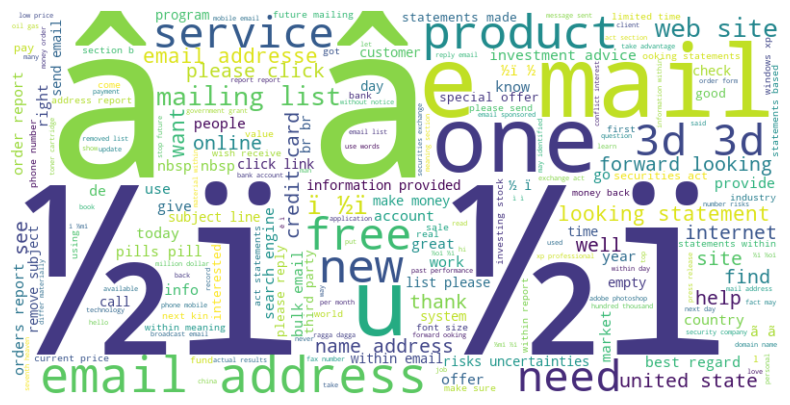

In [20]:
# Generate a word cloud image for spam words
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(spam_emails))

# Display the image
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

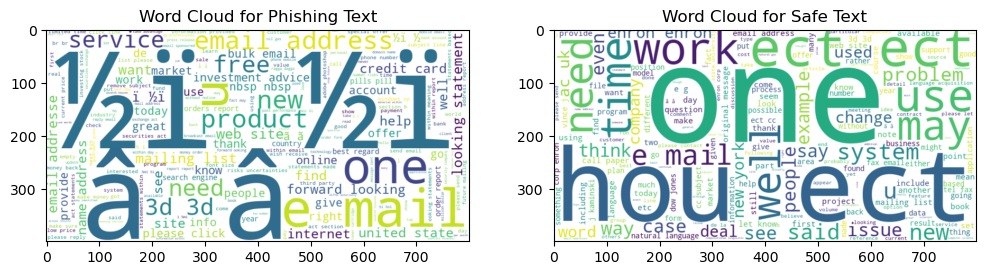

In [21]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
wc_spam = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(spam_emails))
plt.imshow(wc_spam, interpolation='bilinear')
plt.title('Word Cloud for Phishing Text')

# Word cloud for non-spam emails
plt.subplot(1, 2, 2)
wc_non_spam = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(legit_emails))
plt.imshow(wc_non_spam, interpolation='bilinear')
plt.title('Word Cloud for Safe Text')

plt.show()

In [22]:
df["length"] = df["Email Text"].str.len()
df.head()


Unnamed: 0                                         Email Text  \
0           0  6 1100 disc uniformitarianism 1086 sex lang di...   
1           1  side galicismos galicismo spanish term names i...   
2           2  equistar deal tickets still available assist r...   
3           3  hello hot lil horny toy one dream open minded ...   
4           4  software incredibly low prices 86 lower draper...   

       Email Type  length  
0      Safe Email     594  
1      Safe Email     316  
2      Safe Email     786  
3  Phishing Email     314  
4  Phishing Email     361

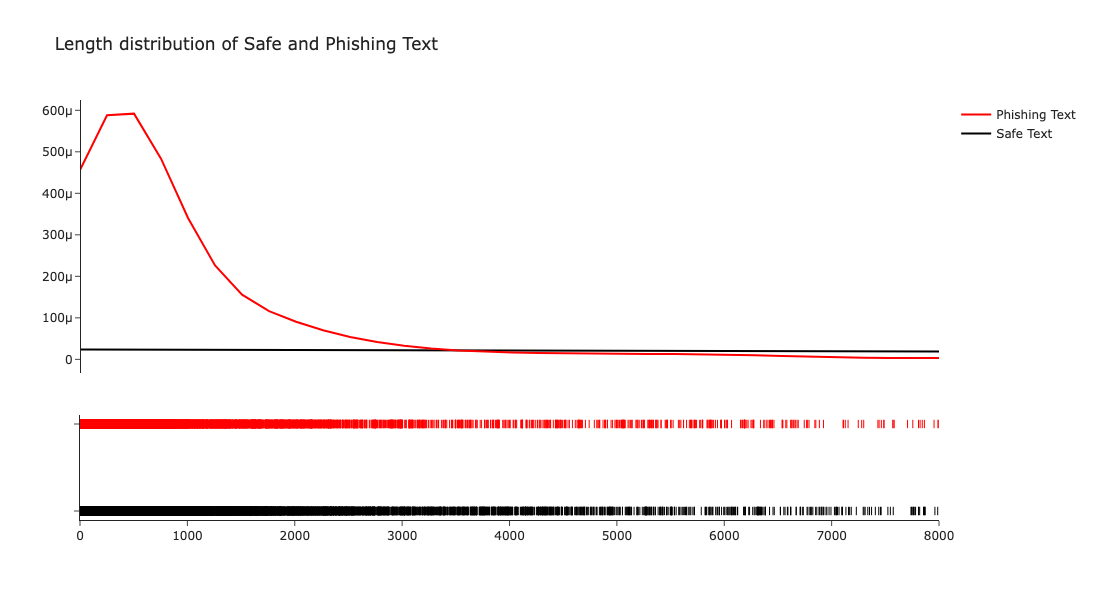

In [23]:
# Corrected filtering based on 'Email Type'
hist_data = [df[df['Email Type'] == 'Safe Email']['length'], df[df['Email Type'] == 'Phishing Email']['length']]

group_labels = ['Safe Text', 'Phishing Text']
colors = ['black', 'red']

# Create distplot with curve_type set to 'normal' and increased bin size
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors, bin_size=50)

# Add title, increase graph size, and adjust range of x-axis
fig.update_layout(title_text='Length distribution of Safe and Phishing Text',
                  template='simple_white',
                  height=600,  # Adjust height as needed
                  width=800,   # Adjust width as needed
                  xaxis=dict(range=[0, 8000]))  # Adjust x-axis range as needed
fig.show()


In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Map encoded labels to corresponding categories
label_mapping = {'Safe Email': 0, 'Phishing Email': 1}
df['label_mapped'] = df['Email Type'].map(label_mapping)
df.head()

Unnamed: 0                                         Email Text  \
0           0  6 1100 disc uniformitarianism 1086 sex lang di...   
1           1  side galicismos galicismo spanish term names i...   
2           2  equistar deal tickets still available assist r...   
3           3  hello hot lil horny toy one dream open minded ...   
4           4  software incredibly low prices 86 lower draper...   

       Email Type  length  label_mapped  
0      Safe Email     594             0  
1      Safe Email     316             0  
2      Safe Email     786             0  
3  Phishing Email     314             1  
4  Phishing Email     361             1

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [26]:
# function to get all of strings from dataframe column, and used lower function here.
def get_all_str(df):
    sentence = ''
    for i in range(len(df)):
        sentence += df['text'][i]
    sentence = sentence.lower()
    return sentence

def get_str(lst):
    sentence = ''
    for char in lst:
        sentence += char+' '
    sentence = sentence.lower()
    return sentence

# function to get words from text(string). used RegexpTokenizer
def get_word(text): 
    result = nltk.RegexpTokenizer(r'\w+').tokenize(text.lower())
#     result = result.lower()                                              
#     result = nltk.word_tokenize(text)
    return result

# function to add stopwords to nltp stopword list.
def stopword_list(stop):
    lst = stopwords.words('english')
    for stopword in stop:
        lst.append(stopword)
    return lst

# function to remove stopwords from list.
def remove_stopword(stopwords, lst):
    stoplist = stopword_list(stopwords)
    txt = ''
    for idx in range(len(lst)):
        txt += lst[idx]
        txt += '\n'
    cleanwordlist = [word for word in txt.split() if word not in stoplist] 
    return cleanwordlist

# function to get dataframe from cleanwordlist.
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

# function to lemmatize words
def lemmatization(words):
    lemm = WordNetLemmatizer()
    tokens = [lemm.lemmatize(word) for word in words]
    return tokens

def preprocess(sentence):
    words = get_word(sentence)
    words_ltz = lemmatization(words)
    removed = remove_stopword('1',words_ltz)
    return removed

In [27]:
vector = CountVectorizer(analyzer = preprocess)
X = vector.fit(df['Email Text'])
X_transform = X.transform(df['Email Text'])
tfidf_transformer = TfidfTransformer().fit(X_transform)
X = tfidf_transformer.transform(X_transform)
train_X, test_X, train_y, test_y = train_test_split(X, df['label_mapped'], test_size=0.30, random_state = 8888)    

In [28]:
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score,accuracy_score,classification_report
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [56]:
%%time
from sklearn.neural_network import MLPClassifier

mlp_classifier_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000) 
mlp_classifier_model.fit(train_X, train_y)  

prediction = mlp_classifier_model.predict(test_X)

# Calculate and print classification metrics
print("MLP Classifier")
print("Accuracy score: {:.2f}".format(accuracy_score(test_y, prediction)))
print("Precision score: {:.2f}".format(precision_score(test_y, prediction)))
print("Recall score: {:.2f}".format(recall_score(test_y, prediction)))
print("F1 score: {:.2f}".format(f1_score(test_y, prediction)))

MLP Classifier
Accuracy score: 0.97
Precision score: 0.95
Recall score: 0.98
F1 score: 0.96
CPU times: user 25min 29s, sys: 40min 39s, total: 1h 6min 9s
Wall time: 9min 7s


In [55]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(train_X, train_y)
y_pred = nb_classifier.predict(test_X)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(test_y, y_pred)
conf_matrix = confusion_matrix(test_y, y_pred)
classification_rep = classification_report(test_y, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.9304238955464139

Confusion Matrix:
[[3357   68]
 [ 321 1845]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      3425
           1       0.96      0.85      0.90      2166

    accuracy                           0.93      5591
   macro avg       0.94      0.92      0.92      5591
weighted avg       0.93      0.93      0.93      5591



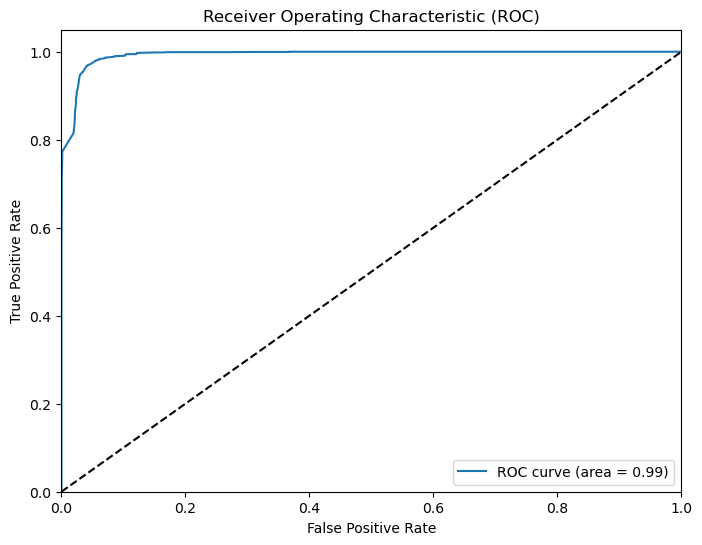

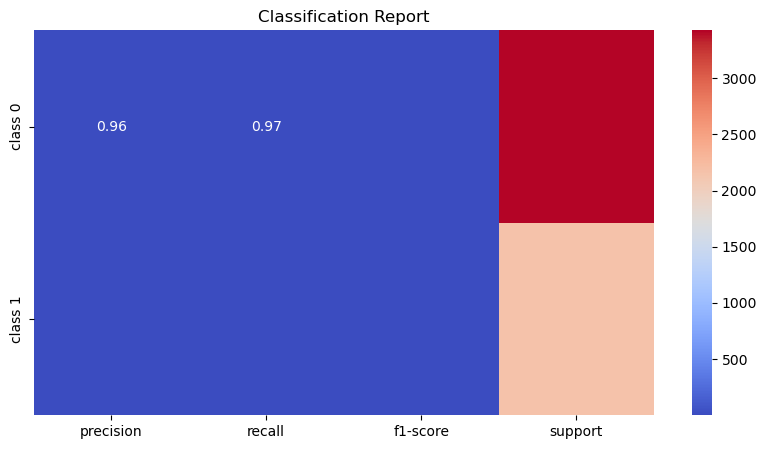

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3425
           1       0.95      0.94      0.95      2166

    accuracy                           0.96      5591
   macro avg       0.96      0.95      0.96      5591
weighted avg       0.96      0.96      0.96      5591



In [59]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Train the classifier
clf = RandomForestClassifier(n_estimators=50, random_state=2)
clf.fit(train_X, train_y)

# Predict probabilities
y_prob = clf.predict_proba(test_X)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(test_y, y_prob)

# Plot ROC curve
fpr, tpr, _ = roc_curve(test_y, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Generate classification report
y_pred = clf.predict(test_X)
report = classification_report(test_y, y_pred, target_names=['class 0', 'class 1'], output_dict=True)

# Convert classification report to DataFrame for visualization
report_df = pd.DataFrame(report).transpose()

# Plot classification report
plt.figure(figsize=(10, 5))
sns.heatmap(report_df.drop(['accuracy', 'macro avg', 'weighted avg'], axis=0), annot=True, cmap='coolwarm')
plt.title('Classification Report')
plt.show()

# Print the overall classification report
print("Classification Report:")
print(classification_report(test_y, y_pred))


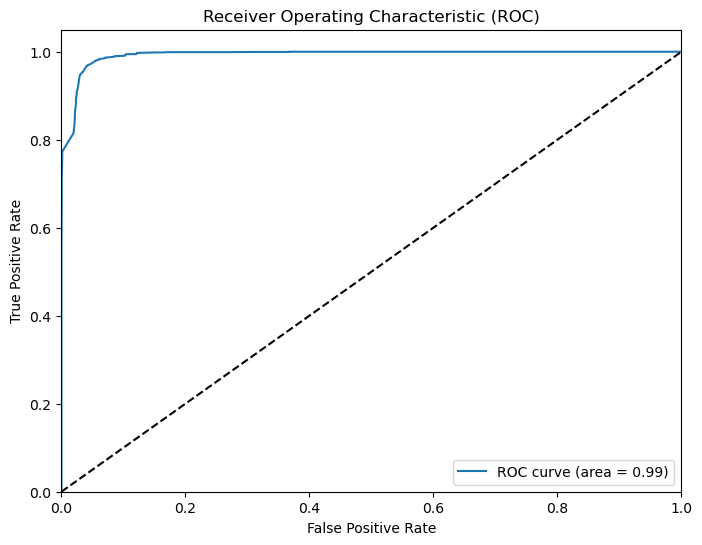

0.9586835986406725


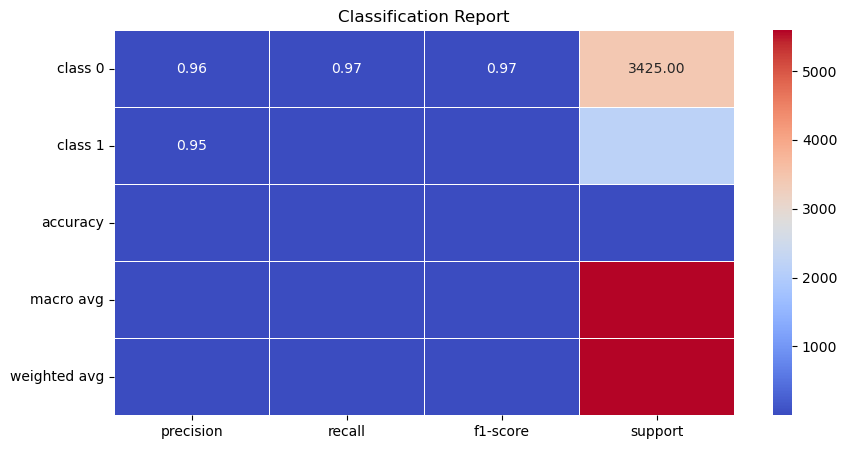

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3425
           1       0.95      0.94      0.95      2166

    accuracy                           0.96      5591
   macro avg       0.96      0.95      0.96      5591
weighted avg       0.96      0.96      0.96      5591



In [62]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Train the classifier
clf = RandomForestClassifier(n_estimators=50, random_state=2)
clf.fit(train_X, train_y)

# Predict probabilities
y_prob = clf.predict_proba(test_X)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(test_y, y_prob)

# Plot ROC curve
fpr, tpr, _ = roc_curve(test_y, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Generate classification report
y_pred = clf.predict(test_X)
report = classification_report(test_y, y_pred, target_names=['class 0', 'class 1'], output_dict=True)

# Calculate accuracy
accuracy = accuracy_score(test_y, y_pred)
print(accuracy)

# Convert classification report to DataFrame for visualization
report_df = pd.DataFrame(report).transpose()

# Add accuracy to the DataFrame
report_df.loc['accuracy'] = accuracy

# Plot classification report
plt.figure(figsize=(10, 5))
sns.heatmap(report_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Classification Report')
plt.show()

# Print the overall classification report
print("Classification Report:")
print(classification_report(test_y, y_pred))


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def evaluate_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    roc_auc = roc_auc_score(y_test, y_proba)
    print("ROC AUC:", roc_auc)
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Loop through classifiers and evaluate each one
for name, clf in clfs.items():
    print("Classifier:", name)
    evaluate_classifier(clf, X_train, y_train.values.ravel(), X_test, y_test.values.ravel())


In [63]:
df.head()

Unnamed: 0                                         Email Text  \
0           0  6 1100 disc uniformitarianism 1086 sex lang di...   
1           1  side galicismos galicismo spanish term names i...   
2           2  equistar deal tickets still available assist r...   
3           3  hello hot lil horny toy one dream open minded ...   
4           4  software incredibly low prices 86 lower draper...   

       Email Type  length  label_mapped  
0      Safe Email     594             0  
1      Safe Email     316             0  
2      Safe Email     786             0  
3  Phishing Email     314             1  
4  Phishing Email     361             1

In [92]:
clf = RandomForestClassifier(n_estimators=50, random_state=2)
clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(test_y, y_pred)
conf_matrix = confusion_matrix(test_y, y_pred)
classification_rep = classification_report(test_y, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.9586835986406725

Confusion Matrix:
[[3327   98]
 [ 133 2033]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3425
           1       0.95      0.94      0.95      2166

    accuracy                           0.96      5591
   macro avg       0.96      0.95      0.96      5591
weighted avg       0.96      0.96      0.96      5591



In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

clfs = {
    'NB': mnb,
    'SVC' : svc, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

def train_classifier(clf,train_X,train_y,test_X,test_y):
    clf.fit(train_X,train_y)
    y_pred = clf.predict(test_X)
    accuracy = accuracy_score(test_y, y_pred)
    conf_matrix = confusion_matrix(test_y, y_pred)
    #classification_rep = classification_report(test_y, y_pred)
    precision = precision_score(test_y,y_pred)
    
    return accuracy,conf_matrix,precision

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,conf_matrix,precision = train_classifier(clf,train_X,train_y,test_X,test_y)
    
    print("For ",name)
    print(f"Accuracy: {current_accuracy}")
    print(f"Precision: {precision}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    #print("\nClassification Report:")
    #print(classification_rep)
    print()
    
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(precision)

For  NB
Accuracy: 0.9304238955464139
Precision: 0.9644537375849451

Confusion Matrix:
[[3357   68]
 [ 321 1845]]

For  SVC
Accuracy: 0.9706671436236809
Precision: 0.9425287356321839

Confusion Matrix:
[[3295  130]
 [  34 2132]]

For  DT
Accuracy: 0.7878733679127169
Precision: 0.8786707882534776

Confusion Matrix:
[[3268  157]
 [1029 1137]]

For  LR
Accuracy: 0.9590413164013594
Precision: 0.9234805421950153

Confusion Matrix:
[[3250  175]
 [  54 2112]]

For  RF
Accuracy: 0.9586835986406725
Precision: 0.9540122008446739

Confusion Matrix:
[[3327   98]
 [ 133 2033]]



/Users/smaran/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



For  AdaBoost
Accuracy: 0.9100339831872652
Precision: 0.8403602128530495

Confusion Matrix:
[[3035  390]
 [ 113 2053]]

For  BgC
Accuracy: 0.9382936862815239
Precision: 0.9059295586268391

Confusion Matrix:
[[3214  211]
 [ 134 2032]]

For  ETC
Accuracy: 0.9552852799141477
Precision: 0.9610202117420596

Confusion Matrix:
[[3344   81]
 [ 169 1997]]

For  GBDT
Accuracy: 0.8921480951529244
Precision: 0.9427762039660057

Confusion Matrix:
[[3324  101]
 [ 502 1664]]

For  xgb
Accuracy: 0.9542121266320873
Precision: 0.9155787641427328

Confusion Matrix:
[[3231  194]
 [  62 2104]]



In [106]:
df.head()

Unnamed: 0                                         Email Text  \
0           0  6 1100 disc uniformitarianism 1086 sex lang di...   
1           1  side galicismos galicismo spanish term names i...   
2           2  equistar deal tickets still available assist r...   
3           3  hello hot lil horny toy one dream open minded ...   
4           4  software incredibly low prices 86 lower draper...   

       Email Type  length  label_mapped  
0      Safe Email     594             0  
1      Safe Email     316             0  
2      Safe Email     786             0  
3  Phishing Email     314             1  
4  Phishing Email     361             1

In [112]:
#Create a TF-IDF vectorizer to convert text messages into numerical feature
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english',lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [107]:
Xs=df['Email Text']
ys=df['label_mapped']

In [111]:

X_train,X_test,y_train,y_test = train_test_split(Xs,ys,test_size=0.2,random_state=2)

In [113]:
model = LogisticRegression()
model.fit(X_train_features,y_train)

LogisticRegression()

In [114]:
# Model evaluation
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

# Print accuracy
print('Accuracy on training data: {} %'.format(accuracy_on_training_data * 100))
print('Accuracy on test data: {} %'.format(accuracy_on_test_data * 100))

Accuracy on training data: 97.5313611055209 %
Accuracy on test data: 96.00214649852428 %


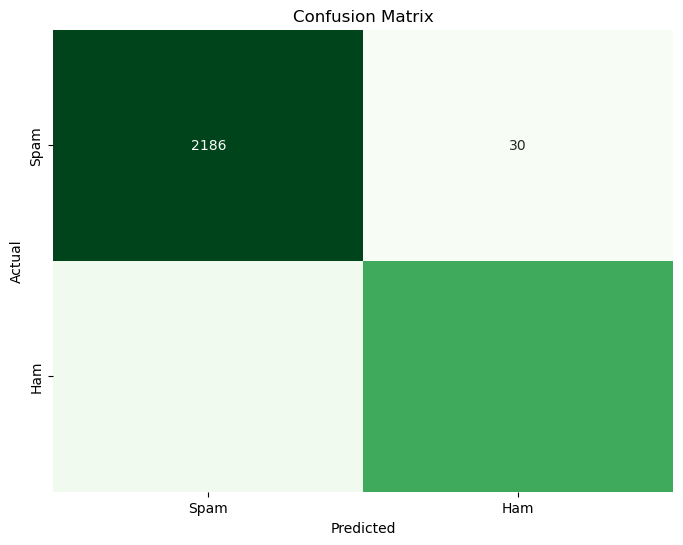

In [115]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, prediction_on_test_data)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [116]:
# Classification report
classification_rep = classification_report(y_test, prediction_on_test_data,target_names=['Spam', 'Ham'])
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

        Spam       0.95      0.99      0.97      2216
         Ham       0.98      0.92      0.95      1511

    accuracy                           0.96      3727
   macro avg       0.96      0.95      0.96      3727
weighted avg       0.96      0.96      0.96      3727



In [117]:
# Metrics calculation
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Accuracy : ",accuracy)
print("Precision : ",precision)
print("Recall : ",recall)
print("Specificity : ",specificity)

Accuracy :  0.9600214649852428
Precision :  0.9789029535864979
Recall :  0.9212442091330245
Specificity :  0.9864620938628159


In [142]:
#Spam i/p: Congratulations! You've won a luxury vacation package worth $10,000! Click here to claim your prize now!
#Ham i/p: Dear John, I hope this email finds you well. Attached is the report you requested for our upcoming meeting. Please review it at your convenience
input_your_mail = input()
input_data_features = feature_extraction.transform([input_your_mail])
prediction = model.predict(input_data_features)
if prediction[0] == 1:
    print("\n Not Safe")
else:
    print("\n Safe")

 Dear Sir/Madam,  We hope this email finds you well.  Following the success of our Jobinar series on Careers in IoT, AI & Cloud, we are excited to announce our upcoming Jobinar session on Explore Careers in Data Science, scheduled for 14th Mar 2024, 5-6 PM IST.  We believe this session will provide valuable insights for your students.  We request you to share this information with your students and encourage them to register today. The session is completely free of cost, and we have limited seats to ensure an interactive and enriching experience.  To secure their seats, students and faculty can register at: https://iur.ls/RegistrationExploreCareersInDataScience



 Safe


MultinomialNB()
For  Multinomial Naive Bayes
Accuracy: 0.921384491548162
Precision: 0.9975490196078431

Confusion Matrix:
[[2213    3]
 [ 290 1221]]


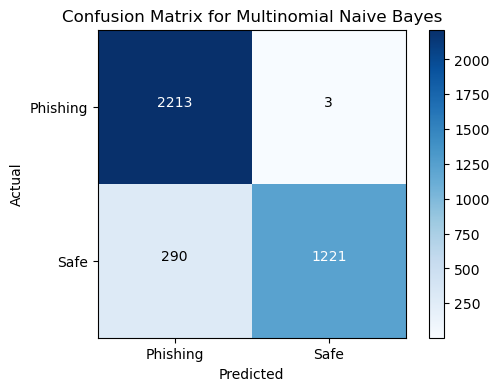


SVC(gamma=1.0, kernel='sigmoid')
For  Support Vector Classifier
Accuracy: 0.9723638314998658
Precision: 0.9495530012771393

Confusion Matrix:
[[2137   79]
 [  24 1487]]


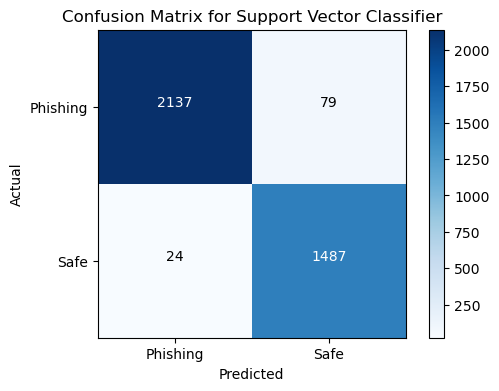


DecisionTreeClassifier(max_depth=5)
For  Decision Trees Classifier
Accuracy: 0.7813254628387443
Precision: 0.8849557522123894

Confusion Matrix:
[[2112  104]
 [ 711  800]]


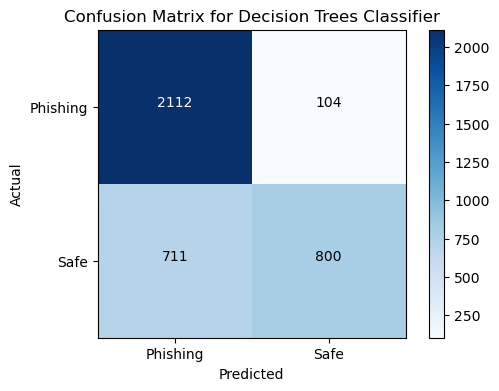


LogisticRegression(penalty='l1', solver='liblinear')
For  Logistic Regression
Accuracy: 0.9500939093104374
Precision: 0.9174543163201008

Confusion Matrix:
[[2085  131]
 [  55 1456]]


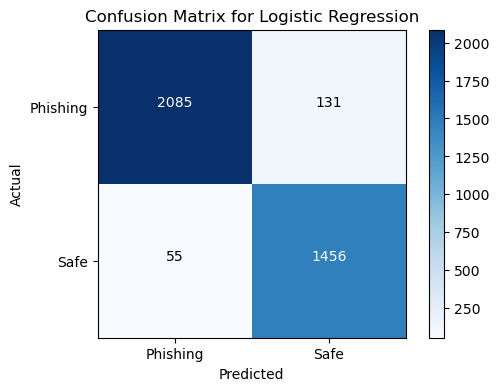


RandomForestClassifier(n_estimators=50, random_state=2)
For  Random Forest Classifier
Accuracy: 0.9613630265629193
Precision: 0.9481967213114754

Confusion Matrix:
[[2137   79]
 [  65 1446]]


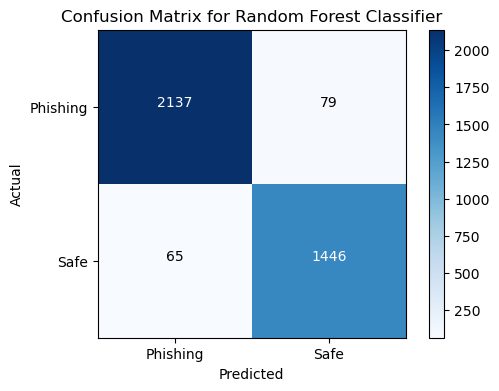

/Users/smaran/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoostClassifier(random_state=2)
For  AdaBoost Classifier
Accuracy: 0.8996511939898041
Precision: 0.831100757134537

Confusion Matrix:
[[1926  290]
 [  84 1427]]


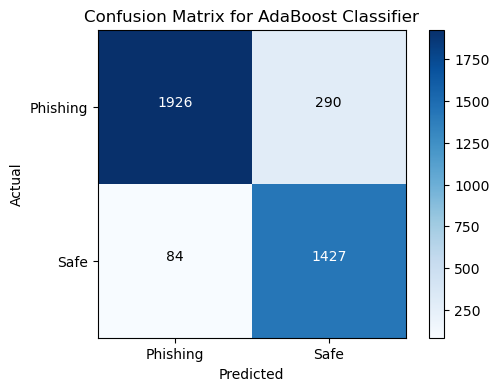


BaggingClassifier(n_estimators=50, random_state=2)
For  Bagging Classifier
Accuracy: 0.9388247920579554
Precision: 0.9026993094789705

Confusion Matrix:
[[2061  155]
 [  73 1438]]


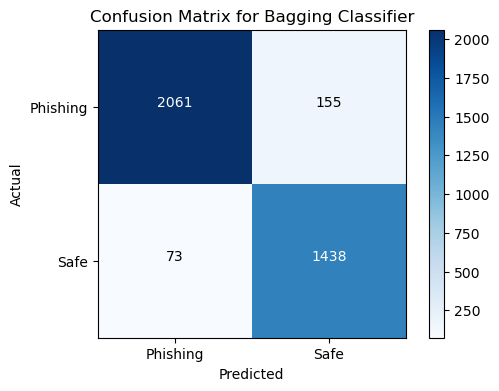


ExtraTreesClassifier(n_estimators=50, random_state=2)
For  Extra Trees Classifier
Accuracy: 0.9656560236114837
Precision: 0.9564356435643564

Confusion Matrix:
[[2150   66]
 [  62 1449]]


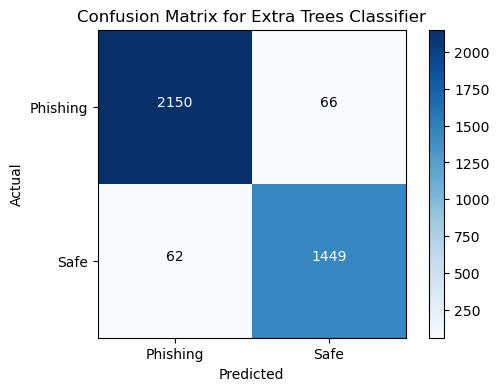


GradientBoostingClassifier(n_estimators=50, random_state=2)
For  Gradient Boosting Classifier
Accuracy: 0.8779178964314462
Precision: 0.9306688417618271

Confusion Matrix:
[[2131   85]
 [ 370 1141]]


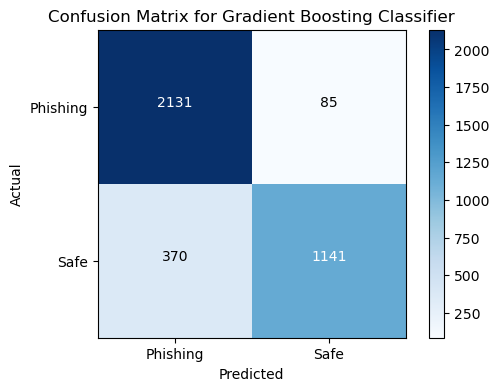


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)
For  Extreme Gradient Boosting Classifier
Accuracy: 0.9436544137375905
Precision: 0.9037864680322781

Confusion Matrix:
[[2061  155]
 [  55 1456]]


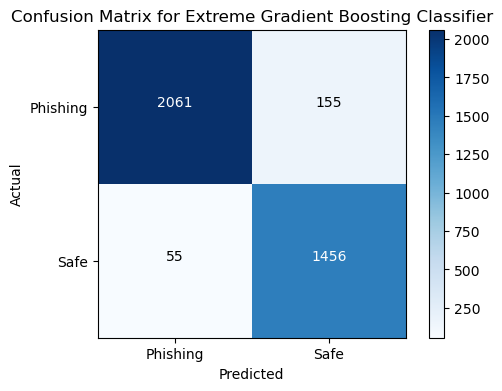

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

clfs = {
    'Multinomial Naive Bayes': mnb,
    'Support Vector Classifier' : svc, 
    'Decision Trees Classifier': dtc, 
    'Logistic Regression': lrc, 
    'Random Forest Classifier': rfc, 
    'AdaBoost Classifier': abc, 
    'Bagging Classifier': bc, 
    'Extra Trees Classifier': etc,
    'Gradient Boosting Classifier':gbdt,
    'Extreme Gradient Boosting Classifier':xgb
}

def train_classifier(clf,train_X,train_y,test_X,test_y):
    print(clf.fit(train_X,train_y))
    y_pred = clf.predict(test_X)
    accuracy = accuracy_score(test_y, y_pred)
    conf_matrix = confusion_matrix(test_y, y_pred)
    #classification_rep = classification_report(test_y, y_pred)
    precision = precision_score(test_y,y_pred)
    
    return accuracy,conf_matrix,precision

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,conf_matrix,precision = train_classifier(clf,X_train_features,y_train,X_test_features,y_test)
    
    print("For ",name)
    print(f"Accuracy: {current_accuracy}")
    print(f"Precision: {precision}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    conf_matrix = np.array(conf_matrix)
    plt.figure(figsize=(6, 4))
    plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
    plt.colorbar()
    classes = ['Phishing', 'Safe']  # Replace with your actual class labels
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    thresh = conf_matrix.max() / 2.
    for i, j in [(i, j) for i in range(conf_matrix.shape[0]) for j in range(conf_matrix.shape[1])]:
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    
    
    #print("\nClassification Report:")
    #print(classification_rep)
    print()
    
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(precision)

In [140]:
from sklearn.ensemble import VotingClassifier

eclf1 = VotingClassifier(estimators=[('SVC', svc), ('RFC', rfc), ('ETC', etc)], voting='soft')
eclf1.fit(X_train_features,y_train)
y_pred = clf.predict(X_test_features)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
#classification_rep = classification_report(test_y, y_pred)
precision = precision_score(y_test,y_pred)

print(accuracy,'\n', precision,'\n', conf_matrix)

0.9436544137375905 
 0.9037864680322781 
 [[2061  155]
 [  55 1456]]


In [141]:
from sklearn.ensemble import VotingClassifier

eclf1 = VotingClassifier(estimators=[('SVC', svc), ('RFC', rfc), ('ETC', etc)], voting='hard')
eclf1.fit(X_train_features,y_train)
y_pred = clf.predict(X_test_features)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
#classification_rep = classification_report(test_y, y_pred)
precision = precision_score(y_test,y_pred)

print(accuracy,'\n', precision,'\n', conf_matrix)

0.9436544137375905 
 0.9037864680322781 
 [[2061  155]
 [  55 1456]]


In [143]:
from sklearn.neural_network import MLPClassifier

mlp_classifier_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000) 
mlp_classifier_model.fit(X_train_features,y_train)  

prediction = mlp_classifier_model.predict(X_test_features)

# Calculate and print classification metrics
print("MLP Classifier")
print("Accuracy score: {:.2f}".format(accuracy_score(y_test, prediction)))
print("Precision score: {:.2f}".format(precision_score(y_test, prediction)))
print("Recall score: {:.2f}".format(recall_score(y_test, prediction)))
print("F1 score: {:.2f}".format(f1_score(y_test, prediction)))

MLP Classifier
Accuracy score: 0.97
Precision score: 0.95
Recall score: 0.99
F1 score: 0.97


In [1]:
input_your_mail = input()
input_data_features = feature_extraction.transform([input_your_mail])
prediction = mlp_classifier_model.predict(input_data_features)
if prediction[0] == 1:
    print("\n Not Safe")
else:
    print("\n Safe")


 Sent from an email address that looks a little funny but still contains a familiar word (netflix3456453435456433@netfIix.com). If you look closely the L in the email domain is actually a capital "I".


NameError: name 'feature_extraction' is not defined

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

clfs = {
    'Multinomial Naive Bayes': mnb,
    'Support Vector Classifier' : svc, 
    'Decision Trees Classifier': dtc, 
    'Logistic Regression': lrc, 
    'Random Forest Classifier': rfc, 
    'AdaBoost Classifier': abc, 
    'Bagging Classifier': bc, 
    'Extra Trees Classifier': etc,
    'Gradient Boosting Classifier':gbdt,
    'Extreme Gradient Boosting Classifier':xgb
}

def train_classifier(clf,train_X,train_y,test_X,test_y):
    clf.fit(train_X,train_y)
    y_pred = clf.predict(test_X)
    classification_rep = classification_report(test_y, y_pred)
    
    return classification_rep


for name,clf in clfs.items():
    
    classification_rep = train_classifier(clf,train_X,train_y,test_X,test_y)
    
    print("For ",name)
    print("\nClassification Report:")
    print(classification_rep)
    print()

For  Multinomial Naive Bayes

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      3425
           1       0.96      0.85      0.90      2166

    accuracy                           0.93      5591
   macro avg       0.94      0.92      0.92      5591
weighted avg       0.93      0.93      0.93      5591


For  Support Vector Classifier

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      3425
           1       0.94      0.98      0.96      2166

    accuracy                           0.97      5591
   macro avg       0.97      0.97      0.97      5591
weighted avg       0.97      0.97      0.97      5591


For  Decision Trees Classifier

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.95      0.85      3425
           1       0.88      0.52      0.66      2166

    accuracy     

/Users/smaran/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



For  AdaBoost Classifier

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      3425
           1       0.84      0.95      0.89      2166

    accuracy                           0.91      5591
   macro avg       0.90      0.92      0.91      5591
weighted avg       0.92      0.91      0.91      5591


For  Bagging Classifier

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3425
           1       0.91      0.94      0.92      2166

    accuracy                           0.94      5591
   macro avg       0.93      0.94      0.94      5591
weighted avg       0.94      0.94      0.94      5591


For  Extra Trees Classifier

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3425
           1       0.96      0.92      0.94      2166

    accuracy                   

KNeighborsClassifier()
For  K Neighbors Classifier
Accuracy: 0.9365050974780897
Precision: 0.9534301452178268

Classification report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3425
           1       0.95      0.88      0.91      2166

    accuracy                           0.94      5591
   macro avg       0.94      0.93      0.93      5591
weighted avg       0.94      0.94      0.94      5591


Confusion Matrix:

[[3332   93]
 [ 262 1904]]


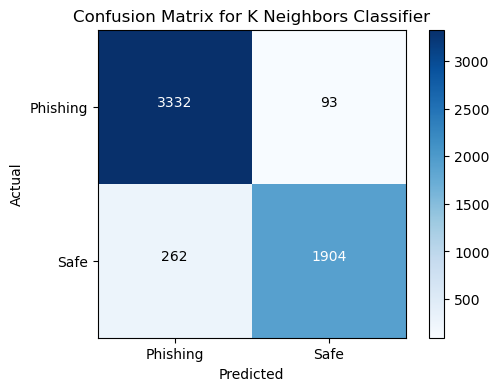

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


knc = KNeighborsClassifier()

clfs = {
    
    'K Neighbors Classifier' : knc
}

def train_classifier(clf,train_X,train_y,test_X,test_y):
    print(clf.fit(train_X,train_y))
    y_pred = clf.predict(test_X)
    accuracy = accuracy_score(test_y, y_pred)
    conf_matrix = confusion_matrix(test_y, y_pred)
    classification_rep = classification_report(test_y, y_pred)
    precision = precision_score(test_y,y_pred)
    
    return accuracy, conf_matrix,precision, classification_rep

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,conf_matrix,precision, classification_rep = train_classifier(clf,train_X,train_y,test_X,test_y)
    
    print("For ",name)
    print(f"Accuracy: {current_accuracy}")
    print(f"Precision: {precision}")
    print('\nClassification report')
    print(classification_rep)
    
    print("\nConfusion Matrix:\n")
    print(conf_matrix)
    conf_matrix = np.array(conf_matrix)
    plt.figure(figsize=(6, 4))
    plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
    plt.colorbar()
    classes = ['Phishing', 'Safe']  # Replace with your actual class labels
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    thresh = conf_matrix.max() / 2.
    for i, j in [(i, j) for i in range(conf_matrix.shape[0]) for j in range(conf_matrix.shape[1])]:
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    
    
    #print("\nClassification Report:")
    #print(classification_rep)
    print()
    
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(precision)

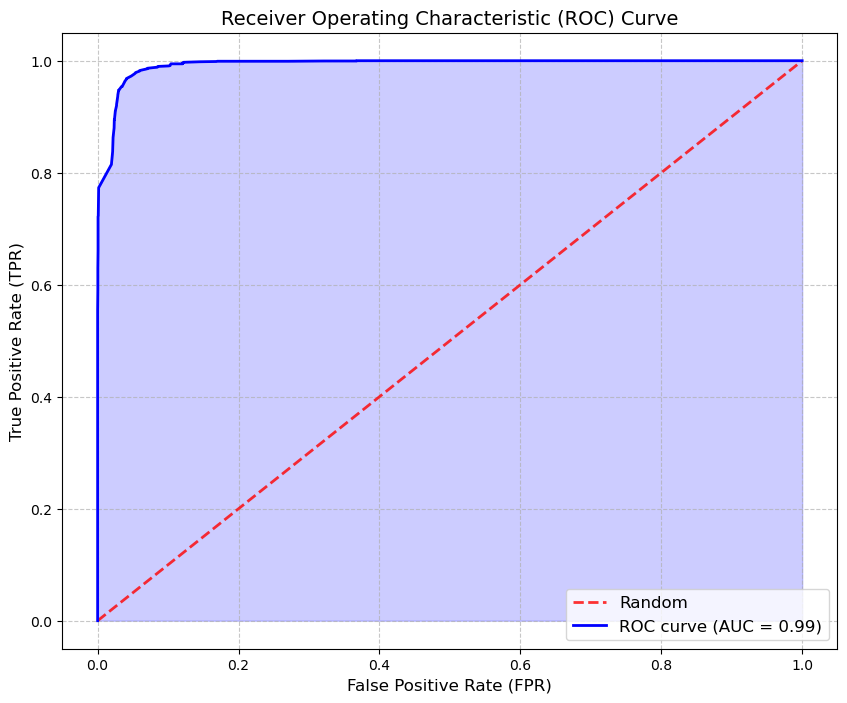

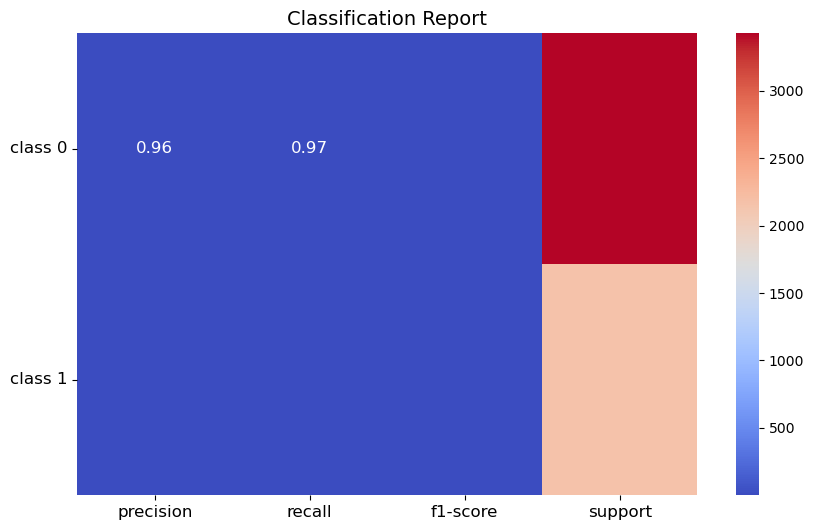

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3425
           1       0.95      0.94      0.95      2166

    accuracy                           0.96      5591
   macro avg       0.96      0.95      0.96      5591
weighted avg       0.96      0.96      0.96      5591



In [37]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already trained and split your data into train_X, train_y, test_X, and test_y

# Train the classifier
clf = RandomForestClassifier(n_estimators=50, random_state=2)
clf.fit(train_X, train_y)

# Predict probabilities
y_prob = clf.predict_proba(test_X)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(test_y, y_prob)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(test_y, y_prob)

# Plot ROC curve with a sophisticated style
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=0.8)
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.fill_between(fpr, tpr, color='b', alpha=0.2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Generate classification report
y_pred = clf.predict(test_X)
report = classification_report(test_y, y_pred, target_names=['class 0', 'class 1'], output_dict=True)

# Convert classification report to DataFrame for visualization
report_df = pd.DataFrame(report).transpose()

# Plot classification report with a sophisticated style
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(report_df.drop(['accuracy', 'macro avg', 'weighted avg'], axis=0), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
heatmap.set_title('Classification Report', fontsize=14)
plt.yticks(rotation=0, fontsize=12)
plt.xticks(fontsize=12)
plt.show()

# Print the overall classification report
print("Classification Report:")
print(classification_report(test_y, y_pred))


/Users/smaran/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



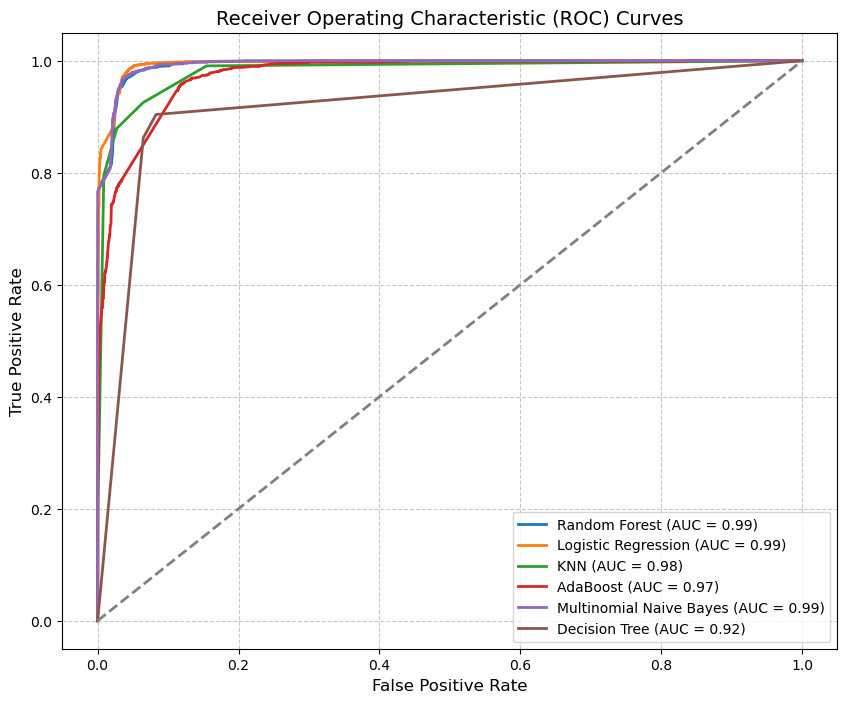

In [38]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming you have already trained and split your data into train_X, train_y, test_X, and test_y for each classifier

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=2),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier()
}

# Plot ROC curve for each classifier
plt.figure(figsize=(10, 8))
for name, clf in classifiers.items():
    clf.fit(train_X, train_y)
    y_prob = clf.predict_proba(test_X)[:, 1]
    roc_auc = roc_auc_score(test_y, y_prob)
    fpr, tpr, _ = roc_curve(test_y, y_prob)
    plt.plot(fpr, tpr, lw=2, label='{} (AUC = {:.2f})'.format(name, roc_auc))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
